Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Taqiya Ehsan"
COLLABORATORS = " "

---

<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name</b>: Taqiya Ehsan<br>
<b>NetID</b>: te137 <br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>:     


<h3>Grader Notes</h3>
<b>Your Grade<b>:<br>
<b>Grader Initials</b>:<br>
<b>Grader Comments</b> (optional):<br>
</div>

# Lab 5: Multivariate Linear Regression

### Due Date: Wednesday December 14, 2022 on or before 11:59 PM

In this lab we will work through the process of:
1. implementing a linear regression model
2. defining, implementing and testing multiple loss functions 
3. minimizing loss functions using gradient descent
4. comparing with python library functions
5. Using the model to predict on test data 


## Initialize

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
%matplotlib inline

# Univariate Linear Regression
In the first task of the lab, we will model linear regression based on a data set that contains housing data (data/USA_Housing.csv). 

# Task 1 - Initialization
Read the file into a dataframe and keep only the features you need. We will be doing univariate and multivariate regression on housing data.The goal is to find a model that will allow us to predict hosuing prices given certain values.

### Activity 1.1  Read Data

In [3]:
import pandas as pd
df = pd.read_csv('data/USA_Housing.csv', sep=',')
# df

# keep only the columns "Avg. Area House Age" and "Avg. Area Number of Rooms" and Price
df_adjusted = df[['Avg. Area House Age','Avg. Area Number of Rooms', 'Price']]
df_adjusted

,Avg. Area House Age,Avg. Area Number of Rooms,Price
0,5.682861,7.009188,1.059034e+06
1,6.002900,6.730821,1.505891e+06
2,5.865890,8.512727,1.058988e+06
3,7.188236,5.586729,1.260617e+06
4,5.040555,7.839388,6.309435e+05
...,...,...,...
4995,7.830362,6.137356,1.060194e+06
4996,6.999135,6.576763,1.482618e+06
4997,7.250591,4.805081,1.030730e+06
4998,5.534388,7.130144,1.198657e+06


In [4]:
## Split the data, df_adjusted into training (90%) and testing (10%) using sklearn
# we will be using test data later in this assignment

from sklearn.model_selection import train_test_split
df_training, df_testing = train_test_split(df_adjusted, test_size=0.1, random_state=50) 

### Activity 1.2 Normalize Data
In this task, you need to normalize df_training data using MinMaxScaler from sklearn.preprocessing. Normalize all df_training data columns to be between 0 and 1. X_scaled_values are the normalized x values of housing data and Y_scaled_values are the scaled values of prices.

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_values = df_training.iloc[:, :-1].to_numpy() 
X_scaled_values = scaler.fit_transform(X_values)

Y_values = df_training.iloc[:, -1].to_numpy().reshape(-1,1)
Y_scaled_values = scaler.fit_transform(Y_values)
# END SOLUTION

X_scaled_values = np.array([X_scaled_values.T[0].reshape(-1,1), X_scaled_values.T[1].reshape(-1,1)])

# call the scaled vectors x and y
x = X_scaled_values
y = Y_scaled_values

In [6]:
x[0]

array([[0.5026345 ],
       [0.28560736],
       [0.3648142 ],
       ...,
       [0.79899389],
       [0.39457287],
       [0.26608873]])

In [7]:
x[1]

array([[0.3073306 ],
       [0.33596457],
       [0.46473142],
       ...,
       [0.32095968],
       [0.35491706],
       [0.35728827]])

In [8]:
y

array([[0.44870955],
       [0.17310412],
       [0.44831884],
       ...,
       [0.5015265 ],
       [0.46460833],
       [0.51405772]])

### Activity 1.3 Plot the feature data to see if a linear regression line is a good fit
It is helpful to understand if the data lends to a linear regression model. In this activity, we will plot the points to see if a line fit to data is reasonable. Plot housing prices vs "Avg. Area House Age" and "Avg. Area Number of Rooms"

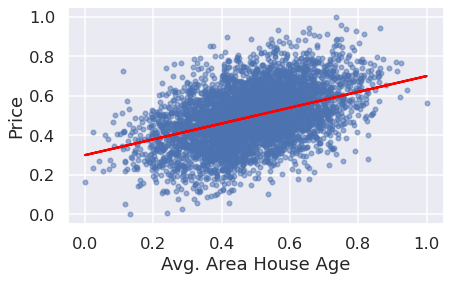

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# plot x = "Avg. Area House Age" and y = price
### BEGIN ANSWER
def h(theta0, theta1, x): return theta0 + theta1*x

plt.scatter(x[0], y, alpha=0.5, s=20)
plt.plot(x[0], h(0.3, 0.4, x[0]), 'red')
plt.xlabel("Avg. Area House Age")
plt.ylabel("Price")
plt.show();
### END ANSWER

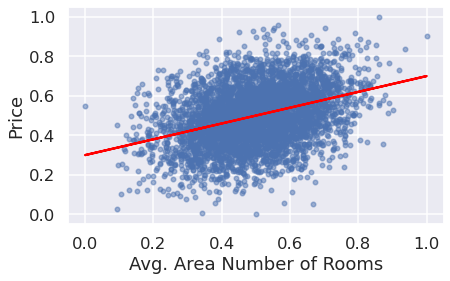

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# plot x = "Avg. Area Number of Rooms" and y = price
### BEGIN ANSWER
plt.scatter(x[1], y, alpha=0.5, s=20)
plt.plot(x[1], h(0.3, 0.4, x[1]), 'red')
plt.xlabel("Avg. Area Number of Rooms")
plt.ylabel("Price")
plt.show();
### END ANSWER

## Question 1.4
##### BEGIN ANSWER
question: Based on what you see in the plot, do you think it is fine to use linear regression to predict housing prices? Why?

answer: Overall there is an upward trend between the age and number of rooms versus the price which would make sense because, logically also, the more rooms the house has the higher its price would be. However, I am skeptical of the implication that older houses cost more as deduced from the first plot.

##### END ANSWER

# Task 2 Manual Exploration of Linear Regression Line
In this task we will manually explore the linear regression line for the model x = "Avg. Area House Age" and y = price. This will give us a good intution about the process.
The goal now is to fit a line 
$$
h(\theta) = \theta_0 + \theta_1*x 
$$
to all data points (x,y), such that the L2 error 
$$
 E(\theta) = \sum(h(\theta)-y)^2 $$ is minimized. In this task we will manually change the values of theta0 and theta1 such that we obtain the smallest possible error. 


In [11]:
# define the function h(theta)
def h(theta0, theta1, x):
    """
    Return the model theta0 + theta1*x
    """
    return theta0 + theta1*x

### Activity 2.1 - Define the square loss (L2) function
Define the function, sqerror that computes the error based on the arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. We use the average square loss or L2 loss in this case. 

In [12]:
import numpy as np

## BEGIN ASNWER
def sqerror(x, y, theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model
    Input: x, y vectors
    Returns: L2 square error
    Assumptions: none
    """    
    return((np.sum(np.power(h(theta0, theta1,x)-y, 2)))/len(x))  
## END ANSWER

## testing
print(sqerror(x[0], y, 0.29, 0.52))
print(sqerror(x[1], y, 0.29, 0.52))

0.018851448326533248
0.021823815395622573


### Activity 2.2 - Define the L1 Absolute error function
Define the function, abserror that computes the avarega absolute error based on the arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. We use the average abssolute error in this case.

In [13]:
import numpy as np
import math

## BEGIN ANSWER
def abserror(x, y, theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model 
    Input: x, y vectors
    Returns: L1 error
    Assumptions: none
    """
    return ((np.sum(abs(h(theta0, theta1, x) - y)))/len(x))
## END ANSWER

## testing
print(abserror(x[0], y, 0.29,0.52))
print(abserror(x[1], y, 0.29,0.52))

0.10961636709557822
0.11777276790770351


### Activity 2.3 - Define the Pseudo Huber loss function
Define the function, huberror that computes the pseudo huber error based on the two arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. The equation for this function is given by 
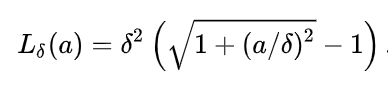
The following function finds the average huber error. In this equation, a  = |h(theta) - y| (see notes for details)

In [14]:
import numpy as np
import math

## BEGIN ANSWER
def huberror(x, y, theta0, theta1, delta):
    """
    Input: parameters theta0, theta1 and delta of the model 
    Input: x, y vectors
    Returns: psuedo huber error
    Assumptions: none
    """
    a = h(theta0, theta1, x) - y
    temp = 1 + ((a/delta)**2)
    huber_loss = (delta**2) * (np.sqrt(temp)-1)
    
    return (np.sum(huber_loss)/len(x)) 

## END ANSWER

## testing
print(huberror(x[0], y, 0.29, 0.52, 0.1))
print(huberror(x[1], y, 0.29, 0.52, 0.1))

0.005791489779469562
0.006458677517895609


### Activity 2.4 Interactive Exploration.
Let us initialize the interat widget to create sliders that allows us to change the values of theta0 and theta1 and see how things change. Complete the function f below. The function is expected to get two values theta0 and theta1 and plot both the observed points (x,y) and the regression line on the same plot. It also needs to compute the error and display and error.

In [15]:
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [16]:
# interactive panel
import pylab
import numpy

def f(theta0, theta1):
    """
    Plot the line and points in an interactive panel
    """
    # plot the line for theta0 and theta1
    y1 = h(theta0, theta1, x[0]) 
    # compose plot
    pylab.plot(x[0], y1) 
    
    # compute the L2 error for theta0 and theta1 for 5 decimal places
    sqerr = round(sqerror(x[0], y, theta0, theta1),6)
    # compute the absolute or L1 error for theta0 and theta1
    abserr = round(abserror(x[0], y, theta0, theta1),4)
    # compute the phub error for theta0 and theta1
    huberr = round(huberror(x[0], y, theta0, theta1, 0.01),4)
    pylab.title('L1=' + str(abserr) + '  L2=' + str(sqerr) + '  hub=' + str(huberr))
    
    # plot the points
    x1 = x[0]   
    y1 = Y_scaled_values
    pylab.scatter(x1, y1, alpha=0.5)
    pylab.show() # show the plot  

interact(f, theta1=(0,1,0.1), theta0=(0,1,0.1));

interactive(children=(FloatSlider(value=0.0, description='theta0', max=1.0), FloatSlider(value=0.0, descriptio…

### Activity 2.5 Record the best values for each error function
Write the "best" values you found for theta0 (y-intercept) and theta1 (slope) and the error. 
This error is the minimum you have observed based on the manual exploration using the widget 
above.

In [ ]:
# BEST VALUES FOR AVE SQUARE ERROR (L2)
theta0 = 0.4
theta1 = 0.2
error = 0.017979

# BEST VALUES FOR AVE ABS ERROR (L1)
theta0 = 0.4
theta1 = 0.2
error = 0.1071

# BEST VALUES FOR AVE HUBER ERROR
theta0 = 0.4
theta1 = 0.2
error = 0.001

# Task 3 - Gradient Descent - Univariate
In this task we use the Gradient descent methods to find a "better" values for theta0 and theta1 that minimizes the error. Gradient descent is an iterative algorithm. It computes values of theta0 and theta1 in the direction of reaching the minimum point in the error function. The iterative formulas using L2 loss function for theta0 and theta1 are given by:
$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_1*x^j + \theta_0)-y^j)
$$
$$
\theta_1 = \theta_1 - \alpha*(\sum(\theta_1*x^j + \theta_0 - y^j)*x^j
$$

The alpha is called the "learning rate". $(x^j, y^j)$ is the j-th observation. It is important to pick a good value for alpha so that convergence is not too slow (small alpha) or be at the risk of over shooting the minimum point (large alpha). You may have to experiemnt with few alphas to find something that works.

### Activity 3.1 Compute Parameters using the Gradient Descent algorithm (L2 loss)

Please print out the theta0 and theta1 values for each iteration in your function. You may get different output compare with the sample output depends on your initial theta0 and theta1 values. We will accept any answers which are close to the sample output.

In [17]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error threshold, 
# the function returns theta0 and theta1 when it reaches the error threshold.
# The convergence is reached when the abs(newError - oldError) is less than the threshold.

# BEGIN ANSWER
def L_0(theta0, theta1, x, y):
    res = (h(theta0, theta1, x) - y)
    res = res.mean()
    return res
    
def L_1(theta0, theta1, x, y):
    res = (h(theta0, theta1, x) - y)*x
    res = res.mean()
    return res
    
def gd2(obsX, obsY, alpha, threshold):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent L2 loss algorithm
    Return: Iterations and L2 Error
    """
    theta0 = 0
    theta1 = 0
    oldError = 0
    newError = sqerror(obsX, obsY, theta0, theta1)
    iterations = 1
    
    while (abs(newError - oldError) >= threshold):
        oldError = newError
        
        d_theta0 = L_0(theta0, theta1, obsX, obsY)
        d_theta1 = L_1(theta0, theta1, obsX, obsY)
        
        theta0 = theta0 - alpha * d_theta0
        theta1 = theta1 - alpha * d_theta1
        
        newError = sqerror(obsX, obsY, theta0, theta1) 
        
        if iterations % 10 == 0:
            print(f'iteration: {iterations}')
            print(f'loss: {sqerror(obsX, obsY, theta0, theta1)}')
            print(f'parameters: theta0 = {theta0}, theta1 = {theta1}')
        
        iterations += 1 
        
    return theta0, theta1, newError, iterations
    
# END ANSWER

theta0_sq, theta1_sq, newError_sq, iterations_sq = gd2(x[0], y, 0.01, 0.0001)
print(iterations_sq)

iteration: 10
loss: 0.21191844943307048
parameters: theta0 = 0.046903220896850104, theta1 = 0.023685972870613574
iteration: 20
loss: 0.16910120762496517
parameters: theta0 = 0.08828188853973072, theta1 = 0.044644437327031467
iteration: 30
loss: 0.1357357904239674
parameters: theta0 = 0.12478385790828524, theta1 = 0.06319513981274943
iteration: 40
loss: 0.10973550692964533
parameters: theta0 = 0.15698101589212873, theta1 = 0.07962033317334023
iteration: 50
loss: 0.08947434827922664
parameters: theta0 = 0.18537818937324876, theta1 = 0.09416917318712348
iteration: 60
loss: 0.07368528214590071
parameters: theta0 = 0.21042100873915306, theta1 = 0.1070615995549428
iteration: 70
loss: 0.06138100092151436
parameters: theta0 = 0.2325028493138357, theta1 = 0.11849176180181001
iteration: 80
loss: 0.05179216644826081
parameters: theta0 = 0.25197095883069554, theta1 = 0.12863104345443463
iteration: 90
loss: 0.044319288558581214
parameters: theta0 = 0.2691318663928142, theta1 = 0.13763073160114686
i

In [18]:
# observe theta0 and theta1
theta0_sq, theta1_sq, newError_sq

(0.34824282013970514, 0.18072708486410383, 0.021786501477507263)

### Activity 3.2 Compute Gradient Descent (Huber)
First Compute a formula for Pseudo huber gradient descent using derivative methods discussed in class and recitation. Similar to L2 descent, use the new formulas (obtained from pseudo huber derivatives) to compute values of theta1, theta1, error. The pseudo huber loss function is provided in Activity 2.3. Use that to differentiate the huber function wrt to theta0 and theta1. 

Please print out the theta0 and theta1 values for each iteration in your function. You may get different output compared with the sample output depending on your initial theta0 and theta1 values. We will accept any answers which are close to the sample output.

In [21]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error, 
# the function returns theta0, theta1, error and iterations
# that reaches a minimum error threshold

def L_0(theta0, theta1, x, y, delta): 
    a = h(theta0, theta1, x) - y
    num = a*delta
    denom = np.sqrt((delta**2) + (a**2))
    res = num / denom
    res = res.mean()
    return res
    
def L_1(theta0, theta1, x, y, delta):
    a = h(theta0, theta1, x) - y
    num = a*delta*x
    denom = np.sqrt((delta**2) + (a**2))
    res = num / denom
    res = res.mean()
    return res

## BEGIN ANSWER
def gdh(obsX, obsY, alpha, threshold, delta):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent huber loss algorithm
    Return: Iterations and huber Error
    """
    
    theta0 = 0
    theta1 = 0
    oldError = huberror(obsX, obsY, theta0, theta1, delta)
    newError = oldError + 100
    iterations = 1
    
    while (abs(newError - oldError) >= threshold):
   
        d_theta0 = float(L_0(theta0, theta1, obsX, obsY, delta))
        d_theta1 = float(L_1(theta0, theta1, obsX, obsY, delta))
        
        # print(d_theta0)
        
        theta0 = theta0 - alpha * d_theta0
        theta1 = theta1 - alpha * d_theta1
        
        oldError = newError
        newError = huberror(obsX, obsY, theta0, theta1, delta) 
        
        if iterations % 10 == 0:
            print(f'iteration: {iterations}')
            print(f'loss: {huberror(obsX, obsY, theta0, theta1, delta)}')
            print(f'parameters: theta0 = {theta0}, theta1 = {theta1}')
        
        iterations += 1 
        
    return theta0, theta1, newError, iterations
    
## END ANSWER

# testing    
theta0,theta1,newError,iterations = gdh(x[0], y, 0.01, 0.000001, 0.01)
theta0,theta1,newError,iterations

iteration: 10
loss: 0.004847946007328328
parameters: theta0 = 0.0009993330640985652, theta1 = 0.00048509080691727495
iteration: 20
loss: 0.004835607209699641
parameters: theta0 = 0.0019986215931025284, theta1 = 0.000970172948982732
iteration: 30
loss: 0.004823269420024654
parameters: theta0 = 0.002997864152981215, theta1 = 0.001455245955758357
iteration: 40
loss: 0.004810932655005427
parameters: theta0 = 0.003997060056174205, theta1 = 0.001940309474458211
iteration: 50
loss: 0.004798596914112308
parameters: theta0 = 0.004996209403026217, theta1 = 0.0024253633024598365
iteration: 60
loss: 0.004786262178653343
parameters: theta0 = 0.005995313114606491, theta1 = 0.0029104074173847455
iteration: 70
loss: 0.004773928411929275
parameters: theta0 = 0.00699437292003692, theta1 = 0.0033954419917948727
iteration: 80
loss: 0.0047615955614572925
parameters: theta0 = 0.007993391254465331, theta1 = 0.003880467380463371
iteration: 90
loss: 0.0047492635634695515
parameters: theta0 = 0.0089923710570451

(0.21900868793517833, 0.10696486575778373, 0.0022133888687107433, 2247)

In [22]:
newError, iterations

(0.0022133888687107433, 2247)

### Activity 3.2
1. Write the values of theta0, theta1, alpha, error that provided the minimum value through gradient descent
2. Experiment the new values of theta0, theta1 to see if the interactive widget shows similar things.

##### BEGIN ANSWER
 
1. The values theta0 = 0.21900868793517833, theta1 = 0.10696486575778373, alpha = 0.01, and error = 0.0022133888687107433 provided the minimum value through gradient descent.
2. Using the widget, our original findings are still shown to be a bit better at minimizing error than the values found with gradient descent. This is possibly due to where we chose our starting theta values and the tendancy of gradient descent to find local minima and not global minima.

##### END ANSWER

### Activity 3.3 Compare with Library Estimators
Now use the sklearn LinearRegression module to automate this process. What coefficients do you get? Are they close to what you received from gradient descent? Find the error from sklearn package. Is that error smaller or bigger than the squared error you received?

In [23]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
result = lm.fit(x[0], y)
print(result.intercept_)
print(result.coef_)

[0.27432228]
[[0.45661798]]


In [ ]:
theta0 = result.intercept_
theta1 = result.coef_
print(f'Error from sklearn package: {sqerror(x[0], y, 0.27432228, 0.45661798)}') 
print(f'Error from my function: {newError_sq}')

Error from sklearn package: 0.016611812091141393
Error from my function: 0.021786501477507263


The error from sklearn is smaller than my squared error 

# Task 4 - Extending the Model to a Bivariate
In this task we extend the model to predict housing price using two features "$x_1 = $Avg. Area House Age" and "$x_2 = $Avg. Area Number of Rooms". The regression model is then defined by  
$$
y = \theta_2*x_2 + \theta_1*x_1 + \theta_0
$$

## Activity 4.1
We need to estimate the values of $\theta_2, \theta_1, \theta_0$. 
The $\theta_0$ formula is given below (using L2 norm). Using the same formating write the formulas for $\theta_1$ and $\theta_2$. The alpha is called the "learning rate". It is important to pick a good value for alpha so that convergence is not too slow (small alpha) or be at the risk of over shooting the minimum point (large alpha). You may have to experiemnt with few alphas to find something that works. 
Refer to class lectures for more help. 

$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_2*x_2^j + \theta_1*x_1^j + \theta_0)-y^j)
$$

**write equations for $\theta_1$ and $\theta_2$ here**

$$
\theta_1 = \theta_1 - \alpha*(\sum(\theta_2*x_2^j + \theta_1*x_1^j + \theta_0)-y^j)*x_1^j
$$

$$
\theta_2 = \theta_2 - \alpha*(\sum(\theta_2*x_2^j + \theta_1*x_1^j + \theta_0)-y^j)*x_2^j
$$

## Activity 4.2 Compute Parameters using the Gradient Descent Algorithm (L2 loss)
Print out the $\theta_0$, $\theta_1$ and $\theta_2$ values for each iteration in your function. You may get different outputs depends on your initial choice of $\theta_0$, $\theta_1$ and $\theta_2$ values. We will accept any answers which are close to the sample output.

In [25]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error threshold, 
# the function returns theta0, theta1 and theta2 when it reaches the error threshold.
# The convergence is reached when the abs(newError - oldError) is less than the threshold.
def g(theta0, theta1, theta2, x):
    """
    Return the model theta0 + theta1*x1 + theta2*x2
    """
    return theta0 + theta1*x[0] + theta2*x[1]

def L2error(x, y, theta0, theta1, theta2):
    """
    Input: parameters theta0 and theta1 of the model
    Input: x, y vectors
    Returns: L2 square error
    Assumptions: none
    """
    res = (g(theta0, theta1, theta2, x) - y)**2 
    res = res.mean()
    return res

def L_0(theta0, theta1, theta2, x, y):
    res = g(theta0, theta1, theta2, x) - y
    res = res.mean()
    return res
    
def L_1(theta0, theta1, theta2, x, y):
    res = (g(theta0, theta1, theta2, x) - y)*x[0]
    res = res.mean()
    return res

def L_2(theta0, theta1, theta2, x, y):
    res = (g(theta0, theta1, theta2, x) - y)*x[1]
    res = res.mean()
    return res

# BEGIN ANSWER
def gd22(obsX, obsY, alpha, threshold):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1, theta2 from Gradient Descent L2 loss algorithm
    Return: Iterations and L2 Error
    """
    
    theta0 = 0
    theta1 = 0
    theta2 = 0
    
    oldError = L2error(obsX, obsY, theta0, theta1, theta2)
    newError = oldError + 100
    iterations = 1
    
    while (abs(newError - oldError) >= threshold):
        
        d_theta0 = L_0(theta0, theta1, theta2, obsX, obsY)
        d_theta1 = L_1(theta0, theta1, theta2, obsX, obsY)
        d_theta2 = L_2(theta0, theta1, theta2, obsX, obsY)
        
        theta0 = theta0 - alpha * d_theta0
        theta1 = theta1 - alpha * d_theta1
        theta2 = theta2 - alpha * d_theta2
        
        oldError = newError
        newError = L2error(obsX, obsY, theta0, theta1, theta2)
        
        if iterations % 10 == 0:
            print(f'iteration: {iterations}')
            print(f'loss: {L2error(obsX, obsY, theta0, theta1, theta2)}')
            print(f'parameters: theta0 = {theta0}, theta1 = {theta1}, theta2 = {theta2}')
        
        iterations += 1 
        
    return theta0, theta1, theta2, newError, iterations
    
# END ANSWER

[theta0, theta1, theta2, newError,iterations] = gd22(x, y, 0.01, 0.0001)
print(theta0, theta1, theta2, newError, iterations)

iteration: 10
loss: 0.20194767482083106
parameters: theta0 = 0.04637310307887198, theta1 = 0.023428895698162092, theta2 = 0.02376571373252001
iteration: 20
loss: 0.15387162170084265
parameters: theta0 = 0.08623526098575385, theta1 = 0.043652676291504315, theta2 = 0.04424403962928127
iteration: 30
loss: 0.11826754300632628
parameters: theta0 = 0.12049450062113903, theta1 = 0.061118203238126036, theta2 = 0.061893394097415844
iteration: 40
loss: 0.09189948783712468
parameters: theta0 = 0.14993222208516402, theta1 = 0.07621002216873192, theta2 = 0.07710826617268958
iteration: 50
loss: 0.07237109923761928
parameters: theta0 = 0.17522085711546365, theta1 = 0.08925905299107964, theta2 = 0.09022813235832718
iteration: 60
loss: 0.05790777467265929
parameters: theta0 = 0.1969390650097876, theta1 = 0.10055006813668624, theta2 = 0.1015451282662996
iteration: 70
loss: 0.04719534675183957
parameters: theta0 = 0.2155848094375537, theta1 = 0.11032812794651678, theta2 = 0.11131065042821432
iteration: 8

Write the values of thetas obtained from function above.
$$\theta_0 = 0.29230200595994776$$ 
$$\theta_1 = 0.1525684921962167$$ 
$$\theta_2 = 0.1526720847641292$$ 
and write the model 
$$
y = 0.1526720847641292*x_2 + 0.1525684921962167*x_1 + 0.29230200595994776
$$

## Activity 4.3 Compare Coefficients with Library Estimators
Now use the sklearn LinearRegression module to automate the process of finding coefficients. 

In [27]:
# fit a regression model
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# assume

Y = y
X = np.stack(x)
X = X.reshape(2, -1).T
Y = Y.reshape(-1)

model = LinearRegression().fit(X, Y)

print(model.coef_)
print(model.intercept_)
print(f"error = {L2error(x, y, 0.09096981082366068, 0.45718158, 0.36702939)}")

[0.45718158 0.36702939]
0.09096981082366068
error = 0.014206854028304308


What coefficients do you get? Are they close to what you received from gradient descent? Is that error smaller or bigger than the squared error you received?

##### Begin Answer
The coefficients are:
* My computation: (theta0, theta1, theta2) = (0.29230200595994776, 0.1525684921962167, 0.1526720847641292)
* Library Estimators: (theta0, theta1, theta2) = (0.09096981082366068, 0.45718158, 0.36702939)

The coefficient values are different from each other.

The error from the Library Estimators is 0.014206854028304308 and from my calculations is 0.01980102403684042 -- these values are also close. My L2 error is slightly greater.
##### End Answer

## Activity 4.4.1 - Predict the Housing Price using test set data - gradient descent
Use the test set to find the estimated value of the home $y$ using coefficients received from gradient descent. Defined the average error as 1/m * $\sum$ abs(predicted - actual) where m is the size of the test data set.

In [28]:
## Begin ANSWER
def error(y_pred, y_gt):
    error = np.abs(y_pred - y_gt)
    return np.sum(error)/len(y_gt.T)

X_scaled_test = scaler.fit_transform(df_testing.iloc[:,[0,1]])
X_scaled_test[:,:] = X_scaled_test

Y_scaled_test = scaler.fit_transform(df_testing[['Price']])
Y_scaled_test[:,:] = Y_scaled_test

x_test = X_scaled_test.T
y_test = Y_scaled_test.T

theta0 = 0.29230200595994776
theta1 = 0.1525684921962167
theta2 = 0.1526720847641292

predictions = g(theta0, theta1, theta2, x_test) 
    
error_gd = error(predictions, y_test)
error_gd

## End ANSWER
# error_gd = 0.1430866776467745

0.1430866776467745

## Activity 4.4.2 - Predict the Housing Price using test set data - library estimator
Use the test set to find the estimated value of the home $y$ using coefficients received from library estimators. Defined the averge error as 1/m * $\sum$ abs(predicted - actual) where m is the size of the test data set.

In [31]:
## Begin ANSWER
theta0_lib = 0.09096981082366068
theta1_lib = 0.45718158
theta2_lib = 0.36702939

pred_lib = g(theta0_lib, theta1_lib, theta2_lib, x_test) 

error_lib = error(pred_lib, y_test)
error_lib

## End ANSWER
# error_lib = 0.12166769692145936

0.12166769692145936

## Activity 4.4.3
Compare the performance of Gradient Descent and Library Estimators. Briefly explain your observations and if there are significant descrepancies, explain them in your words. Do you think either model would be a reasonable model for predicting home prices for new homes on the market? Why or Why not?

### begin answer
The Library Estimator performs better than the Gradient Descent I built. The library estimator error is lower than mine by *0.02*. That said, this difference is to the second decimal and hence negligible. So, in my opinion, both models would perform reasonably in predicting home prices for new homes on the market (although the library estimator would perform slightly better). 
### end answer

### Feedback
Please provide feedback on this lab.
* how would you rate this lab (from 1-lowest, 10-highest) : 7
* how can we improve his lab? : Verify the lab through and through before releasing instead of sending out clarification announcements later.

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please name the file as your_section_your_netID_lab5.jpynb<br>
<b> Submit To: </b> codebench <br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>

@2022 All Rights Reserved. Lab Developed by A.D. Gunawardena for CS 439. DO NOT post a copy of this lab or solutions in public space such as github or on commercial sites. 